# Preprocessing

In [1]:
##Source: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease
#:*
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc,accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,roc_curve,confusion_matrix,ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from neupy import algorithms

In [2]:
#Reading the content of the dataset and removing the id column
df = pd.read_csv('kidney_disease.csv')
df.drop('id',axis=1,inplace=True)
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Getting the list of categorical and numerical values which number matches the one in the dataset info page
categorical_mask = df.dtypes == object
categorical_columns = df.columns[categorical_mask].tolist()
numerical_columns = df.columns[~categorical_mask].tolist()
print("Number of numeric columns {}: {}".format(len(numerical_columns),numerical_columns))
print("Number of categorical columns {}: {}".format(len(categorical_columns),categorical_columns))

Number of numeric columns 11: ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']
Number of categorical columns 14: ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [4]:
#Making sure that categorical values don't have any space or tab before or after their values
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.str.strip())

In [5]:
#Checking which how many values are null in each column
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [6]:
#Imputing numerical columns using mean as strategy
imputer_num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[numerical_columns] = imputer_num_mean.fit_transform(df[numerical_columns])

#Imputing categorical columns using most_frequent as strategy
imputer_cat_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df[categorical_columns] = imputer_cat_most_freq.fit_transform(df[categorical_columns])

df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
#Confirming there are no null values
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [8]:
#After reviewing in detail each column, we found that these three are numerical but somehow are marked as categorical
df[['pcv','wc','rc']].describe()

,pcv,wc,rc
count,400,400,400
unique,43,90,49
top,41,9800,5.2
freq,91,116,148


In [9]:
#Found some missing values in these columns as '?' so we are imputing those as well and changing the columns to be numerical
df[['pcv','wc','rc']] = df[['pcv','wc','rc']].replace('?',np.nan).astype(float)
imputer_num_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
df[['pcv','wc','rc']] = imputer_num_mean.fit_transform(df[['pcv','wc','rc']])

In [10]:
#After inputing and adding changing it to float
df[['pcv','wc','rc']].describe()

,pcv,wc,rc
count,400.000000,400.000000,400.000000
mean,39.255639,8772.932331,4.867920
std,8.190698,2596.801420,0.871448
min,9.000000,2200.000000,2.100000
25%,34.000000,6975.000000,4.500000
50%,41.000000,9400.000000,5.200000
75%,44.000000,9800.000000,5.200000
max,54.000000,26400.000000,8.000000


In [11]:
#Checking that the target variable (classification) is not binary due to two outliers
df['classification'].value_counts()

ckd       250
notckd    150
Name: classification, dtype: int64

In [12]:
#Fixing the issue and making sure the counts are as expected
df['classification'].replace('ckd\t','ckd',inplace=True)
df['classification'].value_counts()

#df.to_csv('cleaned_kidney.csv')

ckd       250
notckd    150
Name: classification, dtype: int64

In [13]:
#Defining a useful method to evaluate our models
def evaluate_model(model,X_test,y_test):
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:,1]
    np.nan_to_num(y_pred_prob,copy=False,nan=.5)
    print("Acc:")
    print(accuracy_score(y_test,y_pred))
    print("F1:")
    print(f1_score(y_test,y_pred))
    print("Rec:")
    print(recall_score(y_test,y_pred))
    print("Prec:")
    print(precision_score(y_test,y_pred))    
    print("ROC_AUC:")
    print(roc_auc_score(y_test,y_pred_prob))

    
def print_confusion_matrix(model,X_test,y_test):
    cm = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(cm,display_labels=['notckd','ckd'])
    disp.plot()
    plt.show()

def plot_roc(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, label='AUC = ' + str(round(roc_auc, 4)))
    plt.legend(loc='lower right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')    
    plt.show()

def plot_prc(y_test, y_pred_prob):
    display = PrecisionRecallDisplay.from_predictions(y_test, y_pred_prob, name='PNN')
    _ = display.ax_.set_title("Precision-Recall Curve")
    plt.show()

# Models with encoding and scaling

In [14]:
#Setting features matrix and target vector
X = df.drop('classification',axis=1)
y = ~df.classification.astype('category').cat.codes.astype(bool)

#Creating test and training splits
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Encoding all categorical variables
encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoded_categorical_train = encoder.fit_transform(X_train[list((set(categorical_columns) - set(['classification'])))])
encoded_categorical_train_df = pd.DataFrame(encoded_categorical_train)
encoded_categorical_test = encoder.transform(X_test[list((set(categorical_columns) - set(['classification'])))])
encoded_categorical_test_df = pd.DataFrame(encoded_categorical_test)

#Encoding all numerical variables
scaler = StandardScaler()
scaled_numerical_train = scaler.fit_transform(X_train.loc[:,numerical_columns])
scaled_numerical_train_df = pd.DataFrame(scaled_numerical_train)
scaled_numerical_test = scaler.transform(X_test.loc[:,numerical_columns])
scaled_numerical_test_df = pd.DataFrame(scaled_numerical_test)

X_train = pd.concat([scaled_numerical_train_df,encoded_categorical_train_df],axis=1)
X_test = pd.concat([scaled_numerical_test_df,encoded_categorical_test_df],axis=1)

Acc:
0.95
F1:
0.9541284403669724
Rec:
0.9122807017543859
Prec:
1.0
ROC_AUC:
0.9995920032639738


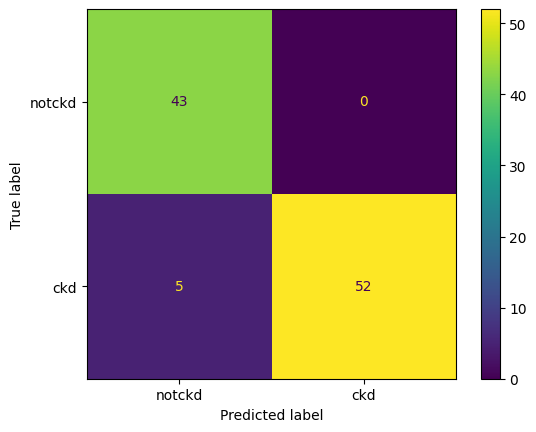

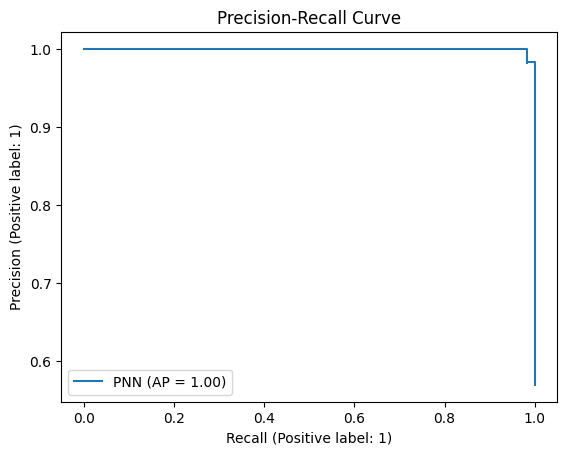

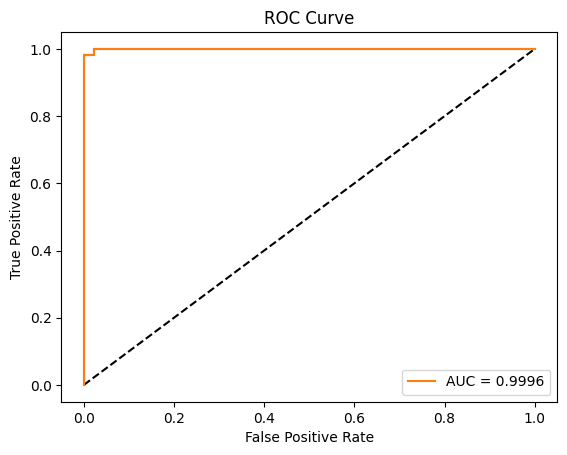

In [15]:
#Created Probabilistic Neural Network (PNN) based on train data and testing it using test data
pnn = algorithms.PNN(std=1, verbose=False)
pnn.train(X_train, y_train)

evaluate_model(pnn,X_test,y_test)
print_confusion_matrix(pnn,X_test,y_test)
y_pred_proba = pnn.predict_proba(X_test)[:,1]
plot_prc(y_test, y_pred_proba)
plot_roc(y_test, y_pred_proba)

pd.DataFrame(y_pred_proba).to_csv('PNN 1st iteration.csv')

#Results are usually worse than both Random Forest and Logistic Regression

(80,)
(80,)


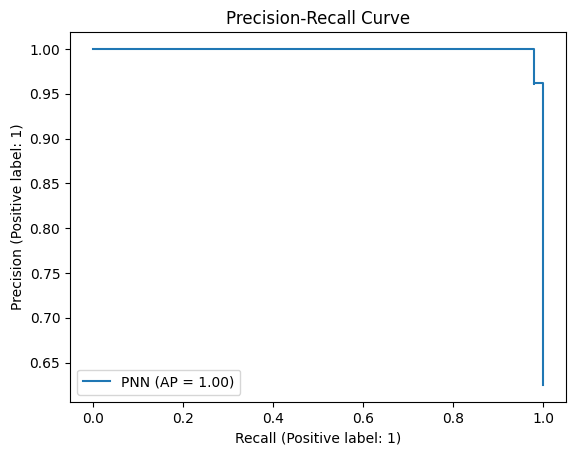

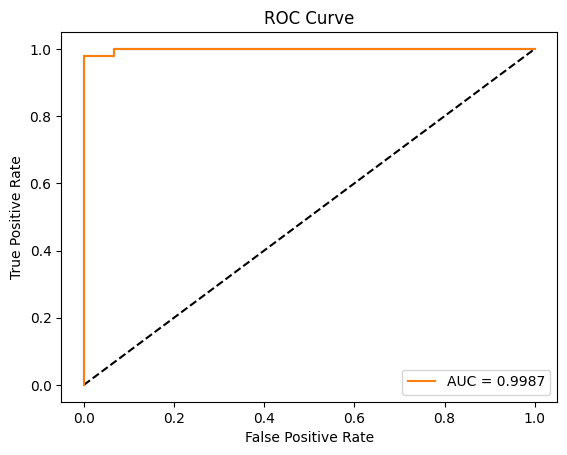

In [23]:
y_pred_proba_2nd = pd.read_csv('NN 2nd iteration.csv').iloc[:,-1].values
y_test_2nd = pd.read_csv('scaled_cleaned_kidney_for_R.csv').iloc[320:,-1].values
print(y_pred_proba_2nd.shape)
print(y_test_2nd.shape)
plot_prc(y_test_2nd, y_pred_proba_2nd)
plot_roc(y_test_2nd, y_pred_proba_2nd)

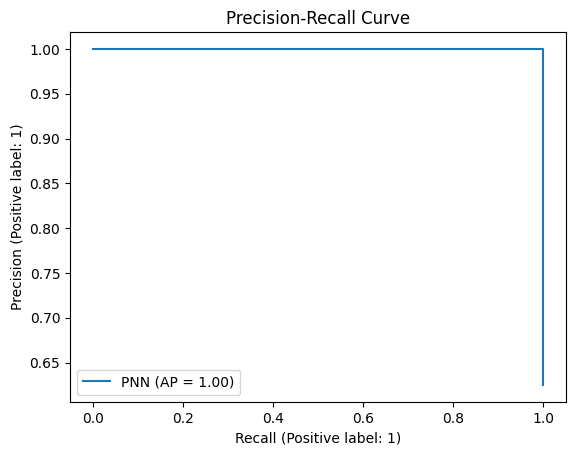

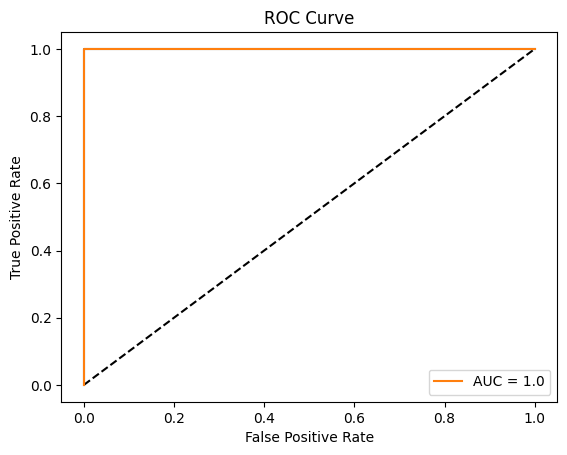

In [24]:
y_pred_proba_3rd = pd.read_csv('NN 3rd iteration.csv').iloc[:,-1].values

plot_prc(y_test_2nd, y_pred_proba_3rd)
plot_roc(y_test_2nd, y_pred_proba_3rd)